In [1]:
import pickle

# Open the input_data_3_1_2.pkl file
with open('input_data_3_1_2.pkl', 'rb') as file:
    input_data_3_1_2 = pickle.load(file)

print(input_data_3_1_2)

([[0.859697724304467, 0.3958582020948516, -1.7939612775574478, -0.6903143106411028, 0.5272669100963684, -0.6096187306436129, 0.23376581083343717, 1.042229978608798, 0.6627036245880215, 0.6771576919938473, -0.8768591799876475, -0.7156782910806191, 1.6208182699628302, 1.1502988176242988, 0.19082740968715112, 0.976697911006261, -0.6507955809982322, 1.7174974202526556, 0.6775586774035063, -0.9528606992037904, -0.46017909489043035, 0.4461589708429915, -0.16480951393357082, -1.0820145101027223, -2.683047722518137, -1.4838107482648155, -0.4967785760556659, 0.5718605025242338, -0.6850792701930594, 1.392793937460087, -0.7269301110767268, 0.17725050271300788, 0.22771261682798305, -0.2332705677414243, -0.1589532799647205, 0.2672579155428948, -0.804856581334484, 1.8163731020444975, 2.9601248310388635, -0.6039476031763618, -2.1545257967648777, 0.9054863121489688, 0.08320786076907637, -0.10296526104244791, 1.9986213912850797, 0.47076109006562494, -0.2670768061796229, -0.06924554154201705, -1.6127961

In [2]:
with open('input_data_3_1_1.pkl', 'rb') as file:
    input_data_3_1_1 = pickle.load(file)

print(input_data_3_1_1)

([[-0.558004390813536, 0.9135955292768635, -0.5044826105900941, -1.0819660896683763, -0.7402513838093632], [0.9291586426286065, -0.8317809277905328, -1.6171471314695387, 0.661431361433632, -0.6949235235757699], [0.04922690793003167, -0.8637826930861834, 1.753799143940072, 1.8680823448605963, 1.2088878413188633], [0.6397271110701065, -0.6599611383801622, -0.5096737962143815, -2.2186682105641746, 1.8423618924932894], [-0.10807064857803043, 0.07341248056873456, -1.0824253310766123, 0.06742817169309076, 1.9449996185272354], [-1.1617941957497873, -0.7684671992478656, 1.0640802591827783, -0.03764016474400397, 1.8193230579096271], [0.9476324662876477, 0.4237534330793301, 1.3330129533647879, -0.23285692870361357, 0.7783765540090019], [0.1391154215687827, -1.2193546471714993, 0.9760174339352314, -0.682259121017393, -0.2842888566745818], [-1.5010246627389807, -0.023928691917104117, 0.24875950595384508, 1.6370702271110904, 0.42003958960661275], [0.34473304793922366, 0.5168285722355436, 0.04830154

In [3]:
from Oracle_Assignment_2 import  q3_linear_1,  q3_linear_2
import numpy as np




D_1_x_1_train =np.array(input_data_3_1_1[0])
D_1_y_1_train =np.array(input_data_3_1_1[1])
D_1_x_1_test = np.array(input_data_3_1_1[2])
D_1_y_1_test = np.array(input_data_3_1_1[3])


D_2_x_2_train = np.array(input_data_3_1_2[0])
D_2_y_2_train = np.array(input_data_3_1_2[1])
D_2_x_2_test = np.array(input_data_3_1_2[2])
D_2_y_2_test = np.array(input_data_3_1_2[3])


print(D_1_x_1_train.shape)
print(D_1_y_1_train.shape)
print(D_1_x_1_test.shape)
print(D_1_y_1_test.shape)
print(D_2_x_2_train.shape)
print(D_2_y_2_train.shape)
print(D_2_x_2_test.shape)
print(D_2_y_2_test.shape)

(20, 5)
(20, 1)
(10, 5)
(10, 1)
(40, 100)
(40, 1)
(20, 100)
(20, 1)


In [11]:
def ols(X, Y):
    Z = np.dot(X.T, X)
    Z_inv = np.linalg.pinv(Z)
    X_inv = np.dot(Z_inv, X.T)
    w_ols = np.matmul(X_inv, Y)
    w_ols = w_ols.flatten()
    return w_ols

print(ols(D_1_x_1_train,D_1_y_1_train))


[0.32669674 0.14850829 0.1615122  0.14611837 0.19504588]


In [5]:

w2 = ols(D_2_x_2_train,D_2_y_2_train)
import pandas as pd

w2 = pd.DataFrame(w2)

w2.to_csv('w_ols_23475.csv', index=False, header=False)

In [6]:

def ridge(X, Y, lmbda):
    n,d = X.shape
    indentity = np.eye(d)
    Z = np.dot(X.T,X) + n*lmbda*indentity
    Z_inv = np.linalg.inv(Z)
    w_ridge = (Z_inv @ (X.T @ Y))
    w_ridge = w_ridge.flatten()
    return w_ridge


print(ridge(D_1_x_1_train,D_1_y_1_train,1))

[0.10132307 0.02747764 0.08496237 0.08561553 0.09166883]


In [7]:
h = ridge(D_2_x_2_train,D_2_y_2_train,1)
h = pd.DataFrame(h)
h.to_csv('w_rr_23475.csv', index=False, header=False)


In [8]:
def mse(X,Y,w):
    n = X.shape[0]
    loss = 0
    for i in range(n):
        loss += (Y[i] - np.dot(X[i], w))**2
    mse = loss/n
    return mse

In [12]:
w_1_ols_D_1_train = ols(D_1_x_1_train,D_1_y_1_train)
print(mse(D_1_x_1_train,D_1_y_1_train,w_1_ols_D_1_train))

w_1_ols_D_1_test = ols(D_1_x_1_test,D_1_y_1_test)
print(mse(D_1_x_1_test,D_1_y_1_test,w_1_ols_D_1_test))

w_1_ridge_D_1_test = ridge(D_1_x_1_test,D_1_y_1_test,1)
print(mse(D_1_x_1_test,D_1_y_1_test,w_1_ridge_D_1_test))

w_1_ridge_D_1_train = ridge(D_1_x_1_train,D_1_y_1_train,1)
print(mse(D_1_x_1_train,D_1_y_1_train,w_1_ridge_D_1_train))

[0.04530838]
[0.02088566]
[0.08967509]
[0.09262986]


In [13]:
w_2_ols_D_2_train = ols(D_2_x_2_train,D_2_y_2_train)
print(mse(D_2_x_2_train,D_2_y_2_train,w_2_ols_D_2_train))

w_2_ols_D_2_test = ols(D_2_x_2_test,D_2_y_2_test)
print(mse(D_2_x_2_test,D_2_y_2_test,w_2_ols_D_2_test))

w_2_ridge_D_2_test = ridge(D_2_x_2_test,D_2_y_2_test,1)
print(mse(D_2_x_2_test,D_2_y_2_test,w_2_ridge_D_2_test))

w_2_ridge_D_2_train = ridge(D_2_x_2_train,D_2_y_2_train,1)
print(mse(D_2_x_2_train,D_2_y_2_train,w_2_ridge_D_2_train))




[5.35180494e-29]
[1.76874941e-28]
[0.74144704]
[2.7867945]


## Q 3.2

In [210]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath('__file__')), 'Oracle_Assignment_2'))

In [404]:
from Oracle_Assignment_2 import q3_stocknet

input_data_3_2 = q3_stocknet(23475)

print(input_data_3_2)

CAT


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("CAT.csv")
column_data_raw = df["Close"]
column_data_array = np.array(column_data_raw)
cl_price = column_data_array.reshape(-1, 1)
print(cl_price.shape)

(1258, 1)


In [405]:
from sklearn.preprocessing import StandardScaler
def Scaling(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

cl_price_scaled = Scaling(cl_price)


In [406]:
cl_price_mean = np.mean(cl_price)
cl_price_std = np.std(cl_price)

In [215]:
def test_train_split(data :np.array):
    n = data.shape[0]
    data_train = data[:int(n/2)]
    data_test = data[int((n/2)):]

    return data_train, data_test


In [216]:
cl_price_train, cl_price_test = test_train_split(cl_price_scaled)

In [348]:
def price_matrix_label(data: np.array, t: int):
    n = data.shape[0]
    matrix = np.zeros((n-t, t))
    label = np.zeros(n-t)
    for i in range(n-t) :
        for j in range(t):
            matrix[i, j] = data[i+j].item()
        label[i] = data[i+t].item()
    return matrix,label



In [ ]:
def price_matrix_label(data: np.array, t: int):
    n = data.shape[0]
    matrix = np.zeros((n-t, t))
    label = np.zeros(n-t)
    for i in range(n-t) :
        for j in range(t):
            matrix[i, j] = data[i+j].item()
        label[i] = data[i+t].item()
    return matrix,label

In [ ]:
cl_price_matrix_train, cl_price_label_train = price_matrix_label(cl_price_train, 7)
cl_price_matrix_test, cl_price_label_test = price_matrix_label(cl_price_test, 7)

In [477]:
import numpy as np
import cvxopt
def linear_dual_solver_3_2_A(X,Y, c, eps):
    n = X.shape[0]
    K = X @ X.T
    M = np.concatenate((np.eye(n), -np.eye(n)), axis=1)
    P = ((M.T @ K) @ M) #Alt  P = np.block([[K, -K], [-K, K]])
    eps_vector = np.ones(n) * eps
    q = np.zeros(n*2)
    q[:n] = eps_vector - Y
    q[n:] = eps_vector + Y
    G = np.zeros((4*n, 2*n))
    G[:2*n, :2*n] = -np.eye(2*n)
    G[2*n : ,:2*n] = np.eye(2*n)
    h = np.zeros(4*n)
    h[:2*n] = 0
    h[2*n:] = c
    A = np.zeros((1,2*n))
    A[0,:n] = 1
    A[0,n:] = -1
    b = np.zeros(1)
    print(P.shape, q.shape, G.shape, h.shape, A.shape, b.shape)
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    G = cvxopt.matrix(G)
    h = cvxopt.matrix(h)
    A = cvxopt.matrix(A)
    b = cvxopt.matrix(b)

    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P,q,G,h,A,b)
    alpha = np.array(solution['x'])
    alpha = alpha.flatten() 
    alpha_plus = alpha[:n]
    alpha_minus = alpha[n:]
    
    return alpha_plus, alpha_minus


In [478]:
cl_price_train_matrix, cl_price_train_label = price_matrix_label(cl_price_train, 30)
print(cl_price_train_matrix.shape)
alpha_p_7, alpha_n_7 = linear_dual_solver_3_2_A(cl_price_train_matrix, cl_price_train_label, 1, 0.1)

print(alpha_p_7[:10])


(599, 30)
(1198, 1198) (1198,) (2396, 1198) (2396,) (1, 1198) (1,)
[9.99999988e-01 9.99999944e-01 8.68074856e-09 3.32544324e-09
 4.57276631e-08 4.94656292e-09 9.91007442e-09 2.89460522e-08
 1.34624585e-08 1.42901265e-08]


In [479]:
def beta(x,y):
    j = x - y
    j = j.flatten()
    return j

beta_7 = (beta(alpha_p_7, alpha_n_7))
print(beta_7.shape)

(599,)


In [481]:
def reg_sup_vec_indices(alpha_p,alpha_n, delta):
    idx = []
    for i in range(len(alpha_p)):
        if alpha_p[i] > delta or alpha_n[i] > delta or abs(alpha_p[i] - alpha_n[i])> delta:
            idx.append(i)
    return idx



In [482]:
print(reg_sup_vec_indices(alpha_p_7,alpha_n_7, 10**(-4)))
print(len(reg_sup_vec_indices(alpha_p_7,alpha_n_7,10**(-4))))

[0, 1, 3, 5, 10, 11, 13, 14, 18, 19, 22, 29, 30, 31, 33, 35, 40, 44, 45, 50, 51, 63, 68, 69, 76, 80, 84, 85, 87, 89, 92, 98, 104, 107, 111, 117, 121, 123, 126, 133, 135, 137, 157, 163, 164, 170, 180, 182, 185, 186, 191, 192, 197, 200, 202, 204, 206, 211, 215, 223, 232, 252, 254, 255, 275, 278, 289, 292, 297, 312, 315, 317, 318, 319, 320, 321, 322, 327, 331, 346, 359, 365, 369, 378, 380, 392, 398, 399, 406, 409, 414, 420, 423, 429, 432, 437, 438, 439, 443, 447, 448, 450, 454, 455, 460, 476, 483, 484, 486, 487, 491, 495, 496, 497, 499, 500, 503, 505, 506, 507, 509, 510, 511, 513, 515, 516, 518, 522, 528, 532, 533, 537, 538, 540, 542, 546, 548, 556, 557, 558, 559, 564, 568, 569, 571, 576, 577, 580, 586, 587, 588, 590, 593, 596]
154


In [483]:
def svr_linear_calc_w(x,theta):
    w = np.zeros(len(x[0]))
    for i in range(len(x)):
        w += theta[i]*x[i]
    return w

def svr_linear_calc_b(x,y,alpha_p,alpha_n, delta):
    w = svr_linear_calc_w(x,beta(alpha_p,alpha_n))
    idx = reg_sup_vec_indices(alpha_p,alpha_n, delta)
    b_val = []
    for j in idx:
        b_val.append(y[j] - np.dot(w,x[j]))
    b = np.mean(b_val)
    
    return b


In [484]:
w_7 = svr_linear_calc_w(cl_price_train_matrix, beta(alpha_p_7,alpha_n_7))
print(w_7.shape)

(30,)


In [ ]:
def predict_linear(x_test, x_train, y_train, theta, alpha_p, alpha_n, delta):
    w = svr_linear_calc_w(x_train, theta)
    b = svr_linear_calc_b(x_train, y_train, alpha_p, alpha_n, delta)
    n = x_test.shape[0]
    predicted_values = []
    for i in range(n):
        predicted = (np.dot(w, x_test[i]) + b)
        predicted_values.append(predicted)
    predicted_values = np.array(predicted_values)
    return predicted_values
    

In [486]:

predicted_values_7 = predict_linear(cl_price_matrix_test, cl_price_train_matrix, cl_price_train_label, beta_7, 10**(-4)) 
print(predicted_values_7.shape)

(599,)


In [487]:
def rbf_kernel_matrix(x_1, x_2,gamma):
    m = len(x_2)
    A = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            z = x_1[i] - x_2[j]
            A[i,j] = np.exp(-gamma*np.dot(z,z))
    return A



In [488]:
def rbf_kernel(x_1, x_2, gamma):
    z = x_1 - x_2
    h = np.exp(-gamma*np.dot(z,z))
    h = h.flatten()
    return h

In [489]:
def kernel_svr_dual(X,Y,c,gamma,eps):
    n = X.shape[0]
    K = rbf_kernel_matrix(X,X,gamma)
    M = np.concatenate((np.eye(n), -np.eye(n)), axis=1) 
    P = ((M.T @ K) @ M)
    eps_vector = np.ones(n) * eps
    q = np.zeros(n*2)
    q[:n] = eps_vector - Y
    q[n:] = eps_vector + Y
    G = np.zeros((4*n, 2*n))
    G[:2*n, :2*n] = -np.eye(2*n)
    G[2*n : ,:2*n] = np.eye(2*n)
    h = np.zeros(4*n)
    h[:2*n] = 0
    h[2*n:] = c
    A = np.zeros((1,2*n))
    A[0,:n] = 1
    A[0,n:] = -1
    b = np.zeros(1)
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    G = cvxopt.matrix(G)
    h = cvxopt.matrix(h)
    A = cvxopt.matrix(A)
    b = cvxopt.matrix(b)

    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P,q,G,h,A,b)
    alpha = np.array(solution['x'])
    alpha = alpha.flatten() 
    alpha_plus = alpha[:n]
    alpha_minus = alpha[n:]
    return alpha_plus, alpha_minus

In [490]:
gamma = 0.1
alpha_p_8, alpha_n_8 = kernel_svr_dual(cl_price_train_matrix, cl_price_train_label, 1, gamma, 0.1)

In [491]:
t_vals = [7,30,90]
gamma_vals = [0.01,0.1,1,10]



In [492]:
def svr_kernel_calc_b(x_train,y_train,theta,gamma,alpha_p,alpha_n, delta):
    idx = reg_sup_vec_indices(alpha_p,alpha_n, delta)
    b_val = []
    for j in idx:
        sum_val = 0
        for k in range(len(x_train)):
            sum_val += theta[k]*y_train[k]* rbf_kernel(x_train[j],x_train[k],gamma)
        b_val.append(y_train[j] - sum_val)
    return np.mean(b_val)

In [493]:
def predict_kernel(x_test, x_train,y_train,gamma, theta, alpha_p,alpha_n, delta):
    b = svr_kernel_calc_b(x_train,y_train, theta, gamma, alpha_p,alpha_n, delta)
    n = x_test.shape[0]
    m = x_train.shape[0]
    predicted_values = []
    sum = 0
    for i in range(n):
        sum = 0
        for j in range(m):
            sum += theta[j]*rbf_kernel(x_test[i],x_train[j],gamma) + b
        predicted_values.append(sum)
    predicted_values = np.array(predicted_values)
    predicted_values = predicted_values.reshape(-1,1)
    return predicted_values



In [501]:
predicted_values_8 = predict_kernel(cl_price_matrix_test, cl_price_train_matrix, cl_price_train_label, 0.1, beta_8, alpha_p_8, alpha_n_8, 10**(-4))

In [507]:
print(predicted_values_8.shape)

(599, 1)


In [432]:
print(predicted_values_8[:10])

NameError: name 'predicted_values_8' is not defined

In [502]:
def scale_up(data):
    data = data*cl_price_std + cl_price_mean
    return data

In [514]:
print(cl_price_label_test[0])
print(predicted_values_8[0])

-0.3762200165256703
[-5286.84633276]


In [505]:
predicted_8_scaled = scale_up(predicted_values_7)   
cl_price_label_test_scaled = scale_up(cl_price_label_test)

In [508]:
print(cl_price_label_test_scaled.shape)

(599,)


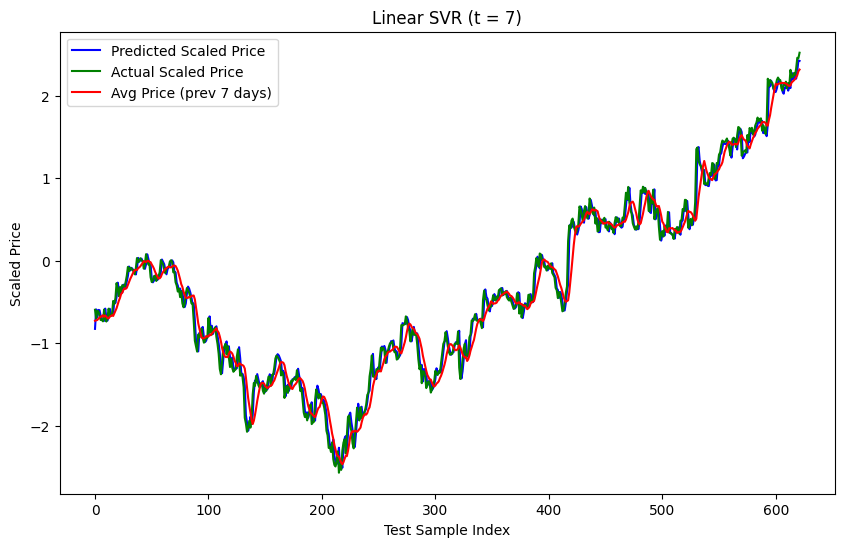

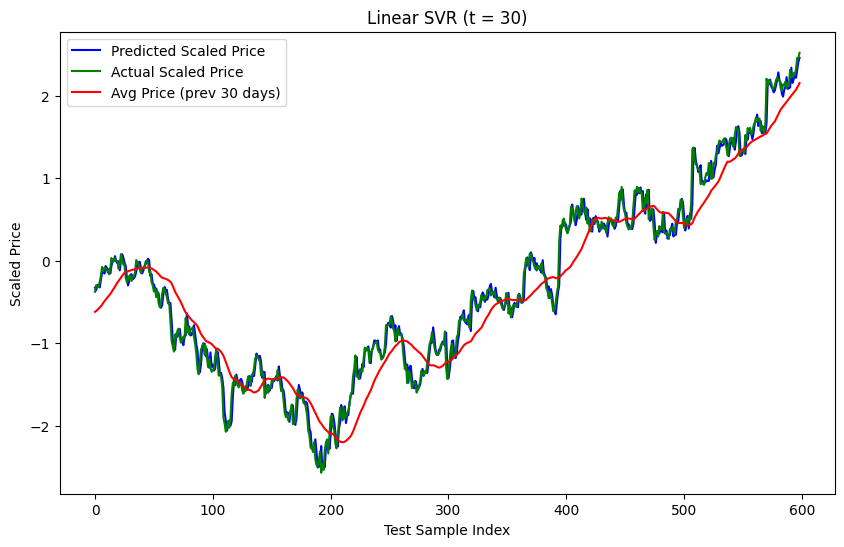

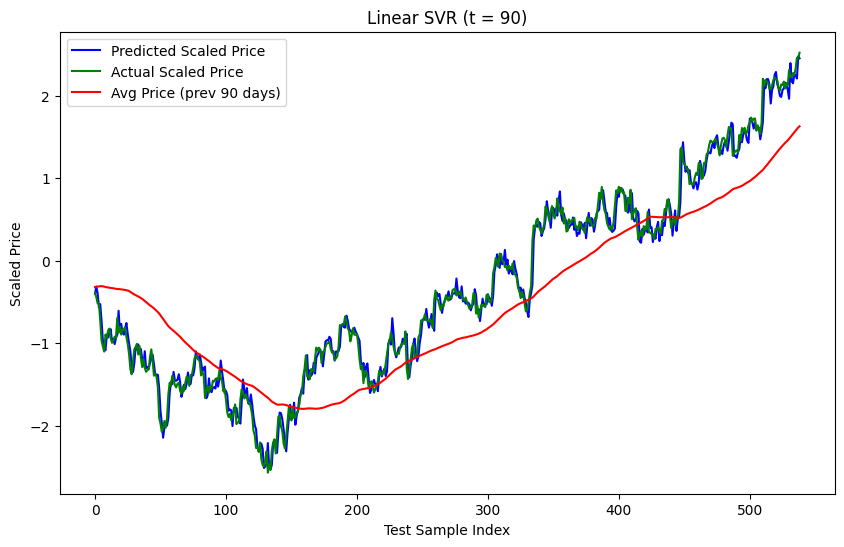

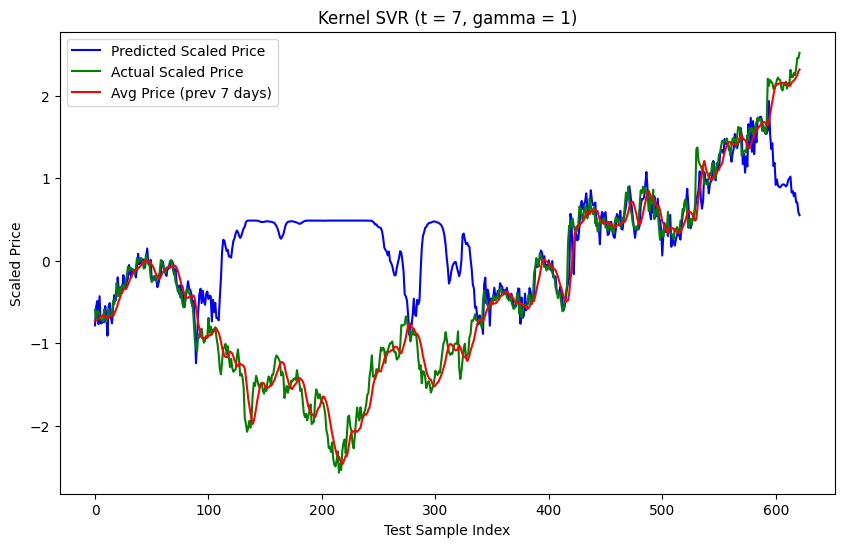

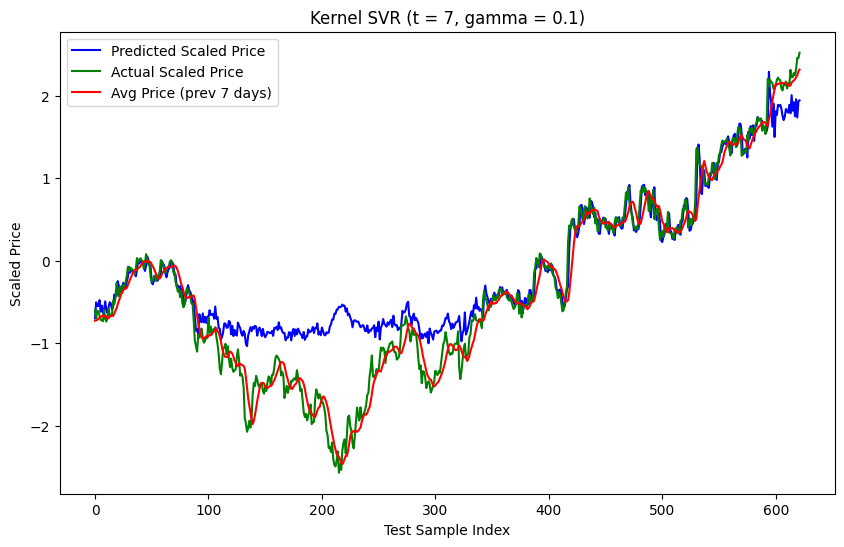

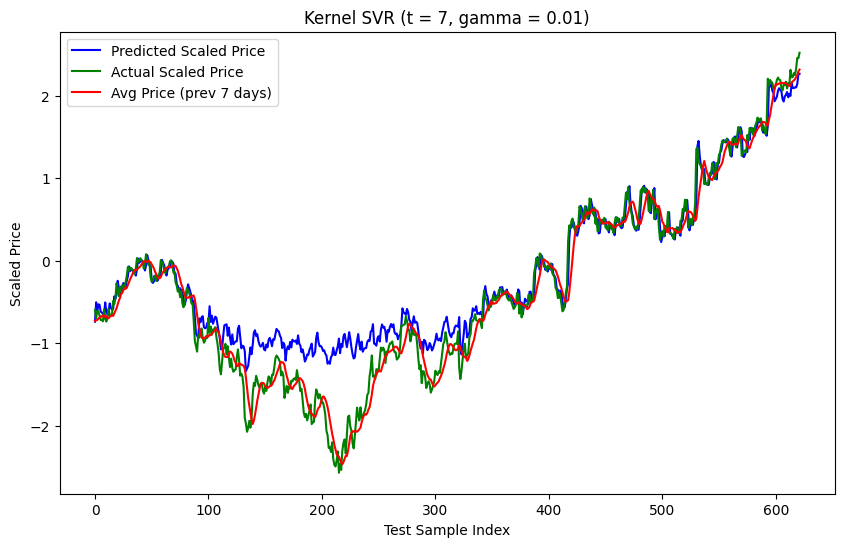

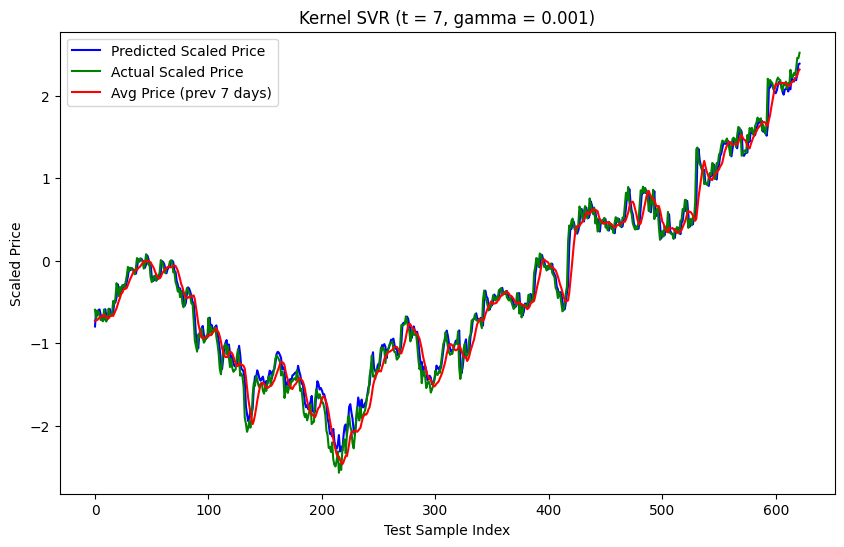

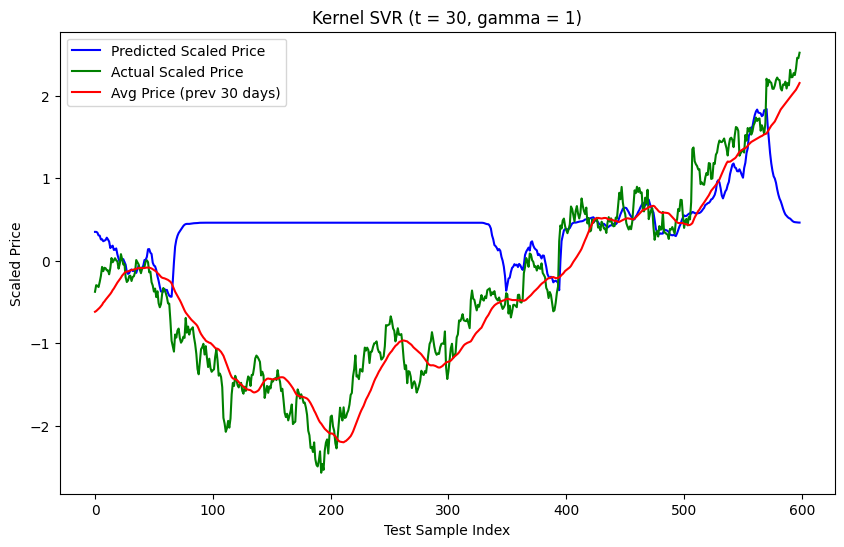

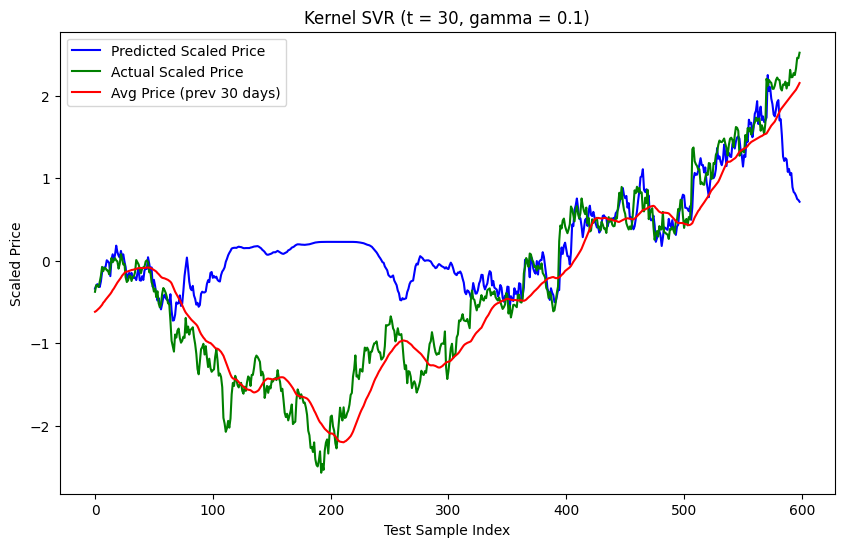

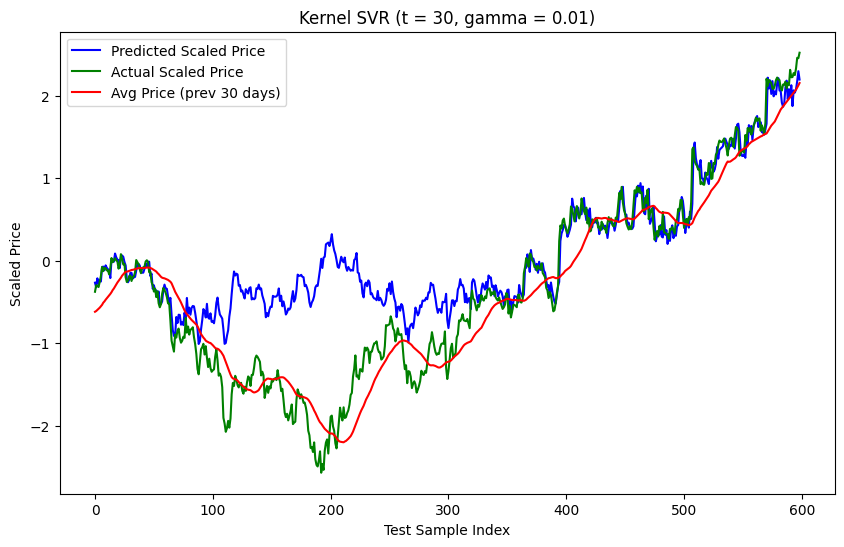

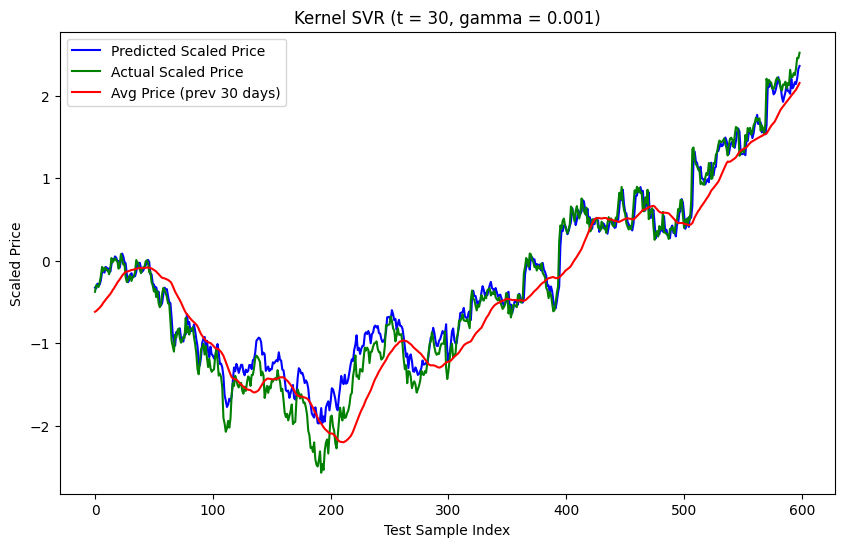

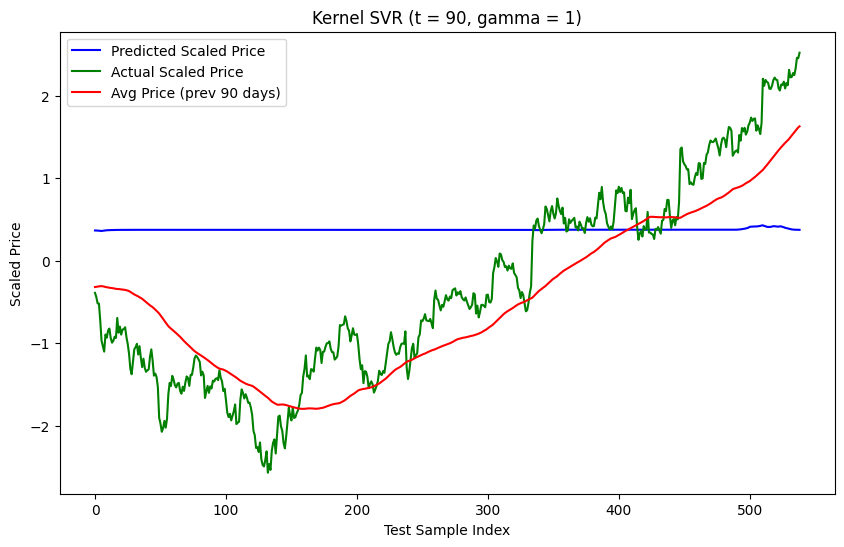

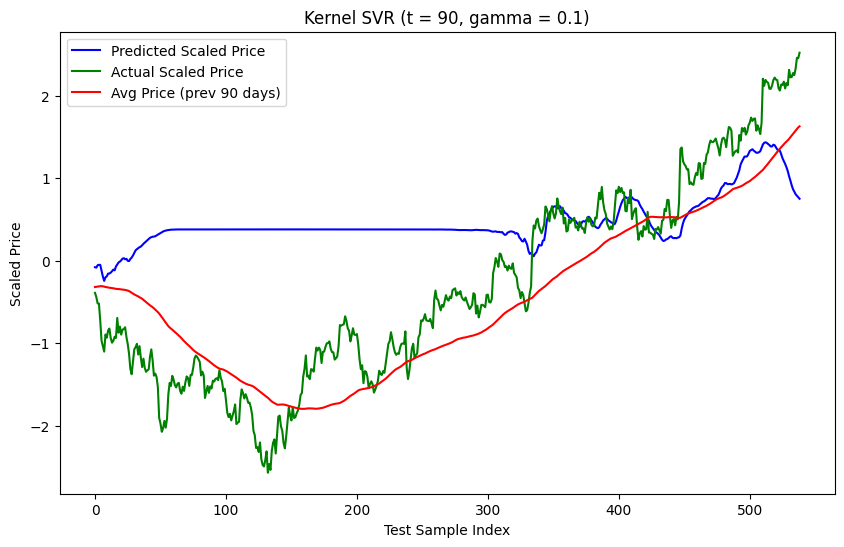

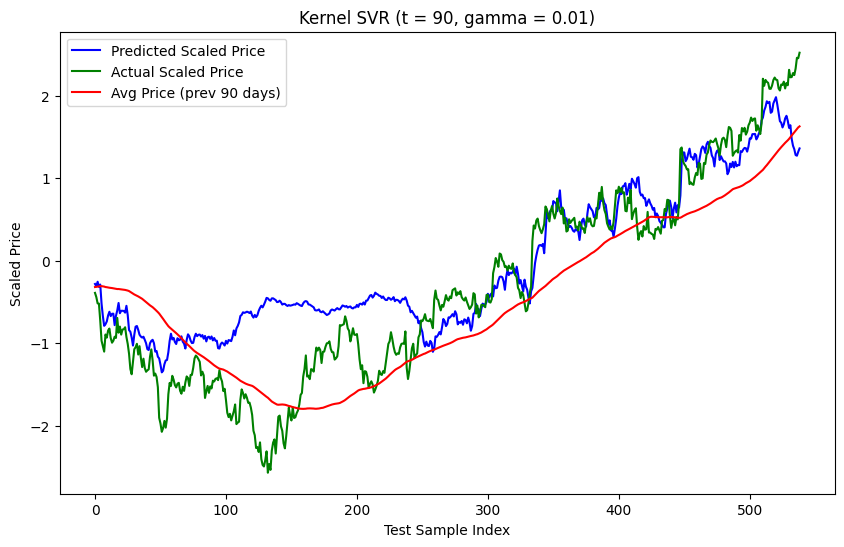

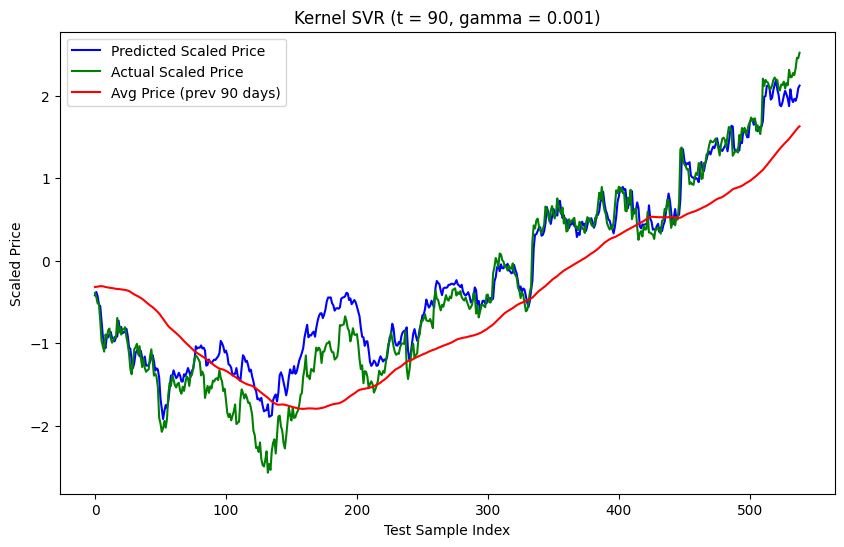

In [ ]:

import pandas as pd
import numpy as np
import cvxopt as cp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("CAT.csv")
column_data_raw = df["Close"]
column_data_array = np.array(column_data_raw)
cl_price = column_data_array.reshape(-1, 1)

def Scaling(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

cl_price_scaled = Scaling(cl_price)


def test_train_split(data: np.array):
    n = data.shape[0]
    data_train = data[:int(n/2)]
    data_test = data[int(n/2):]
    return data_train, data_test

cl_price_train, cl_price_test = test_train_split(cl_price_scaled)


def price_matrix_label(data: np.array, t: int):
    n = data.shape[0]
    d = n-t
    matrix = np.zeros((n-t, t))
    label = np.zeros(n-t)
    for i in range(n-t):
        data_i = data[i:]
        for j in range(t):
            matrix[i, j] = data_i[j][0]
        label[i] = data_i[t][0]
    return matrix, label


def linear_dual_solver_3_2_A(X, Y, c, eps):
    n = X.shape[0]
    K = X @ X.T
    M = np.concatenate((np.eye(n), -np.eye(n)), axis=1)
    P = (M.T @ K) @ M  
    eps_vector = np.ones(n) * eps
    q = np.zeros(n*2)
    q[:n] = eps_vector - Y
    q[n:] = eps_vector + Y
    G = np.zeros((4*n, 2*n))
    G[:2*n, :2*n] = -np.eye(2*n)
    G[2*n:, :2*n] = np.eye(2*n)
    h = np.zeros(4*n)
    h[2*n:] = c
    A = np.zeros((1, 2*n))
    A[0, :n] = 1
    A[0, n:] = -1
    b = np.zeros(1)
    P, q, G, h, A, b = map(cp.matrix, (P, q, G, h, A, b))
    
    cp.solvers.options['show_progress'] = False
    solution = cp.solvers.qp(P, q, G, h, A, b)
    alpha = np.array(solution['x']).flatten()
    alpha_plus = alpha[:n]
    alpha_minus = alpha[n:]
    return alpha_plus, alpha_minus

def beta(x, y):
        z = (x-y)
        z = z.reshape(-1)
        return z


def reg_sup_vec_indices(alpha_p, alpha_n, delta):
    idx = []
    for i in range(len(alpha_p)):
        if alpha_p[i] > delta or alpha_n[i] > delta or abs(alpha_p[i] - alpha_n[i]) > delta:
            idx.append(i)
    return idx

def svr_linear_calc_w(x, theta):
    w = np.zeros(len(x[0]))
    for i in range(len(x)):
        w += theta[i] * x[i]
    return w

def svr_linear_calc_b(x, y, alpha_p, alpha_n, delta):
    w = svr_linear_calc_w(x, beta(alpha_p, alpha_n))
    idx = reg_sup_vec_indices(alpha_p, alpha_n, delta)
    b_vals = []
    for j in idx:
        b_vals.append(y[j] - np.dot(w, x[j]))
    b = np.mean(b_vals)
    return b

def predict_linear(x_test, x_train, y_train, theta, alpha_p, alpha_n, delta):
    w = svr_linear_calc_w(x_train, theta)
    b = svr_linear_calc_b(x_train, y_train, alpha_p, alpha_n, delta)
    predicted_values = []
    for i in range(x_test.shape[0]):
        predicted_values.append(np.dot(w, x_test[i]) + b)
    predicted = np.array(predicted_values)
    predicted = predicted.reshape(-1, 1)
    return np.array(predicted_values)


def rbf_kernel_matrix(x1, x2, gamma):
    m = x1.shape[0]
    n = x2.shape[0]
    K = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            z = x1[i] - x2[j]
            K[i, j] = np.exp(-gamma * np.dot(z, z))
    return K

def rbf_kernel(x1, x2, gamma):
    z = x1 - x2
    return np.exp(-gamma * np.dot(z, z))

def kernel_svr_dual(X, Y, c, gamma, eps):
    n = X.shape[0]
    K = rbf_kernel_matrix(X, X, gamma)
    M = np.concatenate((np.eye(n), -np.eye(n)), axis=1)
    P = (M.T @ K) @ M
    eps_vector = np.ones(n) * eps
    q = np.zeros(n*2)
    q[:n] = eps_vector - Y
    q[n:] = eps_vector + Y
    G = np.zeros((4*n, 2*n))
    G[:2*n, :2*n] = -np.eye(2*n)
    G[2*n:, :2*n] = np.eye(2*n)
    h = np.zeros(4*n)
    h[2*n:] = c
    A = np.zeros((1, 2*n))
    A[0, :n] = 1
    A[0, n:] = -1
    b = np.zeros(1)
    
    P, q, G, h, A, b = map(cp.matrix, (P, q, G, h, A, b))
    
    cp.solvers.options['show_progress'] = False
    solution = cp.solvers.qp(P, q, G, h, A, b)
    alpha = np.array(solution['x']).flatten()
    alpha_plus = alpha[:n]
    alpha_minus = alpha[n:]
    return alpha_plus, alpha_minus

def svr_kernel_calc_b(x_train, y_train, theta, gamma, alpha_p, alpha_n, delta):
    idx = reg_sup_vec_indices(alpha_p, alpha_n, delta)
    b_vals = []
    for j in idx:
        sum_val = 0
        for k in range(len(x_train)):
            sum_val += theta[k] * rbf_kernel(x_train[j], x_train[k], gamma)
        b_vals.append(y_train[j] - sum_val)
    b = np.mean(b_vals)
    return b
 

def predict_kernel(x_test, x_train, y_train, gamma, theta, alpha_p, alpha_n, delta):
    b = svr_kernel_calc_b(x_train, y_train, theta, gamma, alpha_p, alpha_n, delta)
    predicted_values = []
    for i in range(x_test.shape[0]):
        s = 0
        for j in range(x_train.shape[0]):
            s += theta[j] * rbf_kernel(x_test[i], x_train[j], gamma)
        s += b  
        predicted_values.append(s)
    predicted = np.array(predicted_values)
    predicted.reshape(-1, 1)
    return predicted

t_vals = [7, 30, 90]
gamma_vals = [1, 0.1, 0.01, 0.001]  
c = 100
eps = 0.1
delta = 1e-5  
def prev_t_average(matrix):
    mean = np.mean(matrix, axis=1)
    mean.reshape(-1, 1)
    return mean


for t in t_vals:

    X_train, Y_train = price_matrix_label(cl_price_train, t)
    X_test, Y_test = price_matrix_label(cl_price_test, t)
    avg_test = prev_t_average(X_test)
    

    alpha_p, alpha_n = linear_dual_solver_3_2_A(X_train, Y_train, c, eps)
    theta = beta(alpha_p, alpha_n)
    
    Y_pred = predict_linear(X_test, X_train, Y_train, theta, alpha_p, alpha_n, delta)
    

    plt.figure(figsize=(10, 6))
    plt.plot(Y_pred, label="Predicted Scaled Price", color='blue')
    plt.plot(Y_test.reshape(-1, 1), label="Actual Scaled Price", color='green')
    plt.plot(avg_test, label=f"Avg Price (prev {t} days)", color='red')
    plt.title(f"Linear SVR (t = {t})")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Scaled Price")
    plt.legend()
    plt.show()


for t in t_vals:

    X_train, Y_train = price_matrix_label(cl_price_train, t)
    X_test, Y_test = price_matrix_label(cl_price_test, t)
    avg_test = prev_t_average(X_test)
    
    for gamma in gamma_vals:
       
        alpha_p, alpha_n = kernel_svr_dual(X_train, Y_train, c, gamma, eps)
        theta = beta(alpha_p, alpha_n)
        
     
        Y_pred = predict_kernel(X_test, X_train, Y_train, gamma, theta, alpha_p, alpha_n, delta)
        
        plt.figure(figsize=(10, 6))
        plt.plot(Y_pred, label="Predicted Scaled Price", color='blue')
        plt.plot(Y_test.reshape(-1, 1), label="Actual Scaled Price", color='green')
        plt.plot(avg_test, label=f"Avg Price (prev {t} days)", color='red')
        plt.title(f"Kernel SVR (t = {t}, gamma = {gamma})")
        plt.xlabel("Test Sample Index")
        plt.ylabel("Scaled Price")
        plt.legend()
        plt.show()
